In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
datos1 = np.loadtxt('/content/drive/My Drive/8vo ciclo ANDREA/Proyecto Intro señales/Lab4 - ECG/ECG/EstadoBasal.txt')
datos2 = np.loadtxt('/content/drive/My Drive/8vo ciclo ANDREA/Proyecto Intro señales/Lab4 - ECG/ECG/AguantandoRespiración.txt')
datos3 = np.loadtxt('/content/drive/My Drive/8vo ciclo ANDREA/Proyecto Intro señales/Lab4 - ECG/ECG/DespuésdeAguantarRespiración.txt')

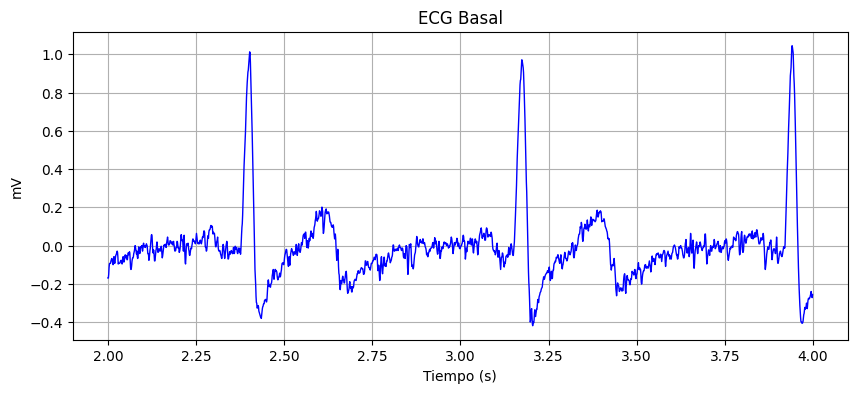

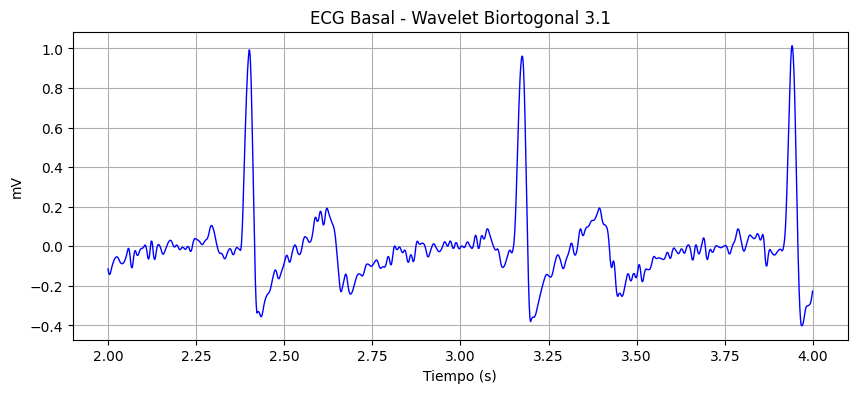

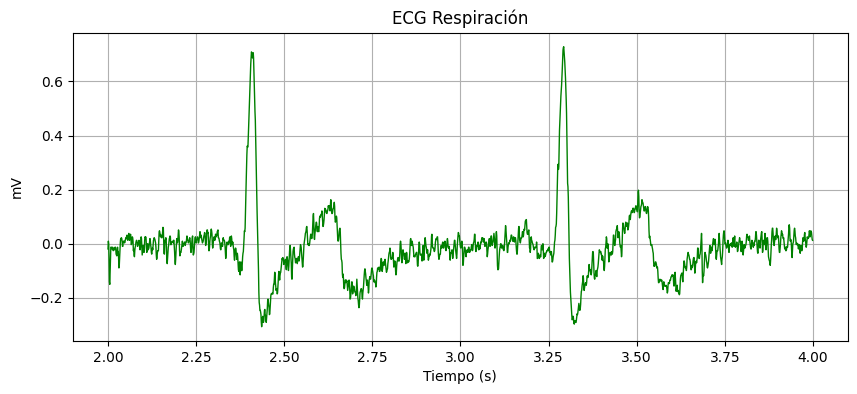

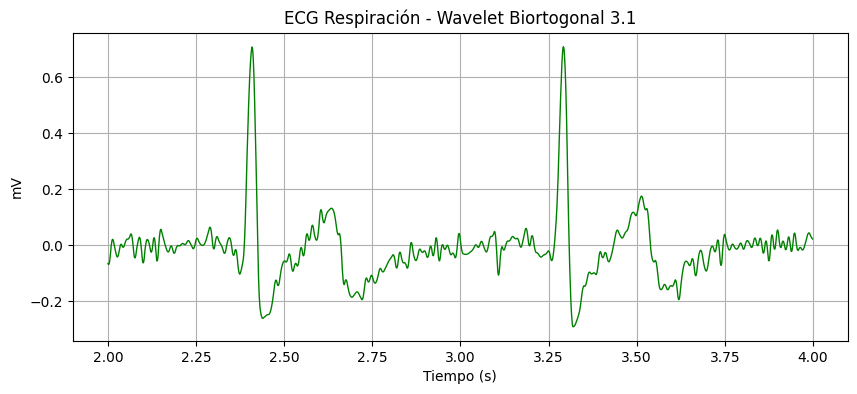

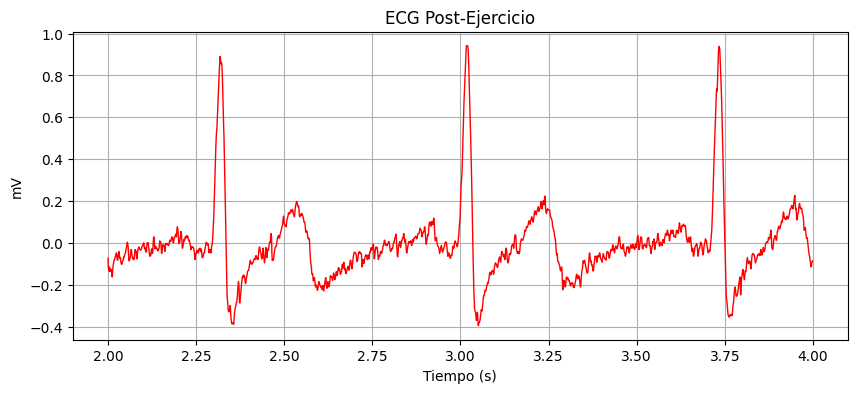

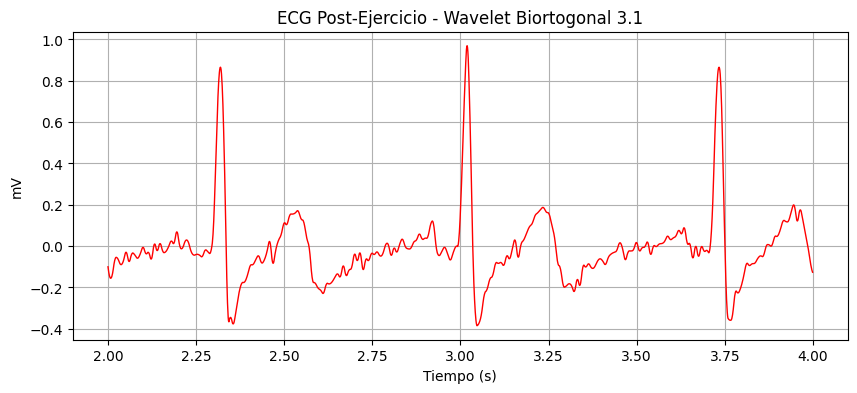

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pywt  # Importa PyWavelets

# Constantes
VCC = 3.3  # Voltaje de alimentación
n = 10     # Número de bits
Fs = 1000  # Frecuencia de muestreo

# Función para aplicar el filtro wavelet
def wavelet_denoising(data, wavelet, level):
    coeff = pywt.wavedec(data, wavelet, mode="per", level=level)
    threshold = np.sqrt(2*np.log(len(data)))
    coeff[1:] = (pywt.threshold(i, value=threshold, mode='soft') for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode='per')
    return reconstructed_signal

# Carga y preparación de datos (adaptar según sea necesario)
def prepare_data(filepath, column_index):
    data = np.loadtxt(filepath, usecols=[column_index])
    data = 1000 * ((((data / (2 ** n)) - 0.5) * VCC) / 1009)  # Conversión a mV
    return data

datos_basal = prepare_data("/content/drive/My Drive/8vo ciclo ANDREA/Proyecto Intro señales/Lab4 - ECG/ECG/EstadoBasal.txt", 6)
datos_respiracion = prepare_data("/content/drive/My Drive/8vo ciclo ANDREA/Proyecto Intro señales/Lab4 - ECG/ECG/AguantandoRespiración.txt", 6)
datos_post_ejercicio = prepare_data("/content/drive/My Drive/8vo ciclo ANDREA/Proyecto Intro señales/Lab4 - ECG/ECG/DespuésdeAguantarRespiración.txt", 6)

# Aplicación del filtro wavelet
datos_basal_wavelet = wavelet_denoising(datos_basal, 'bior3.1', level=3)
datos_respiracion_wavelet = wavelet_denoising(datos_respiracion, 'bior3.1', level=3)
datos_post_ejercicio_wavelet = wavelet_denoising(datos_post_ejercicio, 'bior3.1', level=3)

# Función para graficar las señales filtradas y crudas acotadas
inicio, fin = 2, 4  # Intervalo de tiempo en segundos
inicio_muestreo, fin_muestreo = int(inicio * Fs), int(fin * Fs)

def plot_segment(title, data, tiempo, color, ylabel, filter_name=''):
    plt.figure(figsize=(10, 4))
    plt.plot(tiempo[inicio_muestreo:fin_muestreo], data[inicio_muestreo:fin_muestreo], lw=1, color=color)
    plt.title(f'{title} - {filter_name}' if filter_name else title)
    plt.xlabel('Tiempo (s)')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Graficar cada tipo de datos con nombres de filtros específicos
for label, data_set, filter_name in [('Cruda', datos_basal, ''), ('Wavelet', datos_basal_wavelet, 'Wavelet Biortogonal 3.1')]:
    plot_segment('ECG Basal', data_set, np.arange(len(data_set))/Fs, 'blue', 'mV', filter_name)

for label, data_set, filter_name in [('Cruda', datos_respiracion, ''), ('Wavelet', datos_respiracion_wavelet, 'Wavelet Biortogonal 3.1')]:
    plot_segment('ECG Respiración', data_set, np.arange(len(data_set))/Fs, 'green', 'mV', filter_name)

for label, data_set, filter_name in [('Cruda', datos_post_ejercicio, ''), ('Wavelet', datos_post_ejercicio_wavelet, 'Wavelet Biortogonal 3.1')]:
    plot_segment('ECG Post-Ejercicio', data_set, np.arange(len(data_set))/Fs, 'red', 'mV', filter_name)
